Analyzing Employee Trends to Reduce Attrition Problem: Our company is experiencing a concerning level of employee churn. We need to understand the underlying reasons for this attrition to develop effective retention strategies.

Solution: Data is our key! By analyzing employee trends, we can identify patterns and factors contributing to departures.

What to Explore:

Demographics: Are specific age groups, departments, or job roles more likely to leave?
Performance: Is there a correlation between performance ratings and attrition?
Engagement: Are disengaged employees more likely to exit? Analyze surveys, pulse checks, and exit interviews.
Compensation & Benefits: Are certain pay scales or benefit offerings associated with higher attrition?
Internal Mobility: Do employees seek opportunities within the company before leaving?
External Factors: Are industry trends or competitor offerings influencing our attrition rate?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)


In [2]:

data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
data['Attrition'] = 1.0*(data['Attrition'] == 'Yes')

In [4]:
data.shape

(1470, 35)

In [5]:
data.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
data.describe().round(0).transpose()


,count,mean,std,min,25%,50%,75%,max
Age,1470.0,37.0,9.0,18.0,30.0,36.0,43.0,60.0
Attrition,1470.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
DailyRate,1470.0,802.0,404.0,102.0,465.0,802.0,1157.0,1499.0
DistanceFromHome,1470.0,9.0,8.0,1.0,2.0,7.0,14.0,29.0
Education,1470.0,3.0,1.0,1.0,2.0,3.0,4.0,5.0
EmployeeCount,1470.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,1025.0,602.0,1.0,491.0,1020.0,1556.0,2068.0
EnvironmentSatisfaction,1470.0,3.0,1.0,1.0,2.0,3.0,4.0,4.0
HourlyRate,1470.0,66.0,20.0,30.0,48.0,66.0,84.0,100.0
JobInvolvement,1470.0,3.0,1.0,1.0,2.0,3.0,3.0,4.0


In [7]:
data.describe(include = 'object')

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,3,3,6,2,9,3,1,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1043,961,606,882,326,673,1470,1054


In [8]:
#most employees r sales executive, more male employees. RnD has the most employees, more employees r married

In [9]:
#the minimum age is 18,so 'Over18' column can be dropped
#The 'EmployeeCount' column consists of all 1's, std=0, we dont need this column
#The same with 'StandardHours' column consits of all 40's, they are all identical indicated by the standard deviation being 0, we can drop this column as well
#The 'EmployeeNumber' column is merely the number for each employee, we dont need the column

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   float64
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeNumber            1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

Count the number of missing values in each column and sort them.

In [11]:
#Count (using `.sum()`) the number of missing values (`.isnull()`) in each column of 
#ski_data as well as the percentages (using `.mean()` instead of `.sum()`).
#Order them (increasing or decreasing) using sort_values
#Call `pd.concat` to present these in a single table (DataFrame) with the helpful column names 'count' and '%'
#fortunately,no missing data
missing = pd.concat([data.isnull().sum(), 100 * data.isnull().mean()], axis=1)
#missing.head(100)
missing.columns=['count', '%']
missing.sort_values(by='count',ascending=False)

,count,%
Age,0,0.0
StandardHours,0,0.0
NumCompaniesWorked,0,0.0
Over18,0,0.0
OverTime,0,0.0
PercentSalaryHike,0,0.0
PerformanceRating,0,0.0
RelationshipSatisfaction,0,0.0
StockOptionLevel,0,0.0
MonthlyIncome,0,0.0


In [12]:
# no missing values

In [13]:
#Use `select_dtypes` method to select columns of dtype 'object' - categorical features
data.select_dtypes('object')

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [14]:
#we need to change the 7 categorical data above to int data

#drop unneeded column: Over18, EmployeeCount, EmployeeNumber,and standardHours

In [15]:
data.drop(columns=['EmployeeCount','EmployeeNumber','Over18','StandardHours'], inplace=True)


In [16]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0.0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1.0,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0.0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0.0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0.0,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3
1466,39,0.0,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7
1467,27,0.0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,49,0.0,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8


In [17]:
#Extracting categorical data only into panda df
cat_columns = data.select_dtypes(include='object')
cat_Frame = pd.DataFrame({'Object column Name': cat_columns.columns})
print(cat_Frame)

  Object column Name
0     BusinessTravel
1         Department
2     EducationField
3             Gender
4            JobRole
5      MaritalStatus
6           OverTime


In [18]:
for col_data in cat_columns:
    print(data[col_data].value_counts(),'\n\n')

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64 


Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64 


EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64 


Gender
Male      882
Female    588
Name: count, dtype: int64 


JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64 


MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64 


OverTime
No     1054
Yes     416
Name: count, dtype: int64 




data[['Education_cat','Attrition']].groupby(['Education_cat']).mean().sort_values(by='Attrition', ascending=False).plot(kind='bar')

In [19]:
data['Attrition'].value_counts(normalize=True)

Attrition
0.0    0.838776
1.0    0.161224
Name: proportion, dtype: float64

<Axes: xlabel='Attrition'>

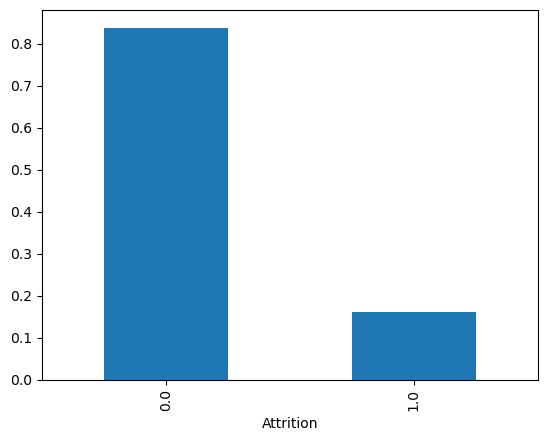

In [20]:
data['Attrition'].value_counts(normalize=True).plot(kind='bar')

#Let's look at the distribution of our target variable: Attrition

<Axes: xlabel='Attrition'>

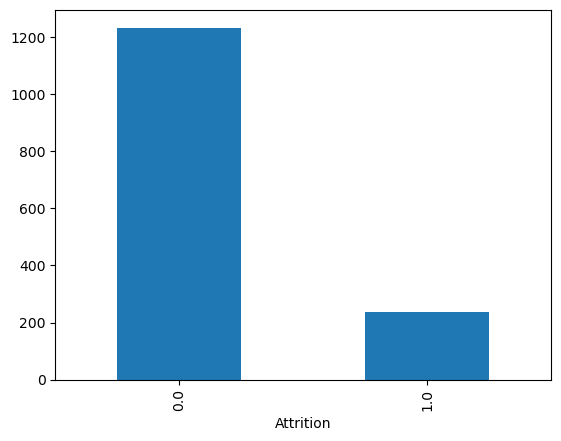

In [21]:
data['Attrition'].value_counts().plot.bar()

count_attrition = data['Attrition'].value_counts()
total_attrition = count_attrition.sum()

#count_attrition.plot.bar()
bar = count_attrition.plot(kind='bar', color='blue')
bar.set_xticklabels(count_attrition.index, rotation=0)
bar.set(xlabel='Attrition', ylabel='Count')

for i, v in enumerate(count_attrition):
    percent_yes = (count_attrition['Yes'] / total_attrition*100)
    percent_no = (count_attrition['No'] / total_attrition*100)



In [22]:
education_map = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}

data['Education_cat'] = data['Education'].replace(education_map)

<Axes: xlabel='Education_cat'>

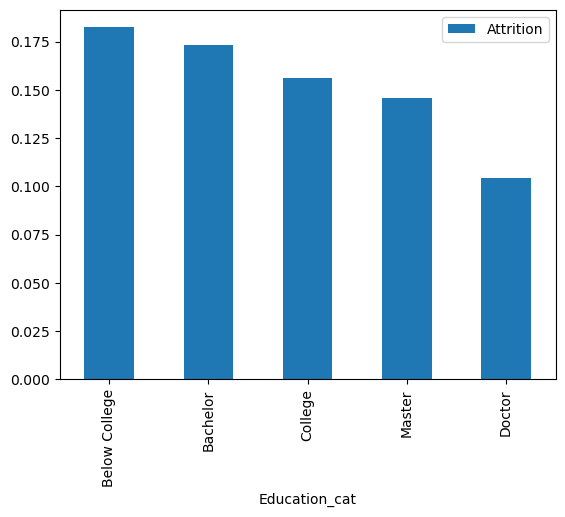

In [23]:

data[['Education_cat','Attrition']].groupby(['Education_cat']).mean().sort_values(by='Attrition', ascending=False).plot(kind='bar')

In [24]:
#attrition rate breakdown by education level shows highest education (doctor) has the lowest attrion rate, below college has the highest attrition rate

In [25]:
#lets explore what factors strongly affect attrition rate.
#we have our categorical columns we want to explore how important it is to the attrition rate: \
#JobInvolvement, Environment Satisfaction, Job Satisfaction, Relationship Satisfaction, Work-Life Balance.

#Hypothesis: It is likely that the "Low" rating within each category will exhibit a higher attrition rate.
#This assumption is based on the notion that these attributes can directly impact an individual's decision to leave the company. 
#They are closely linked to satisfaction with the job involment , work-life balance. etc

# First, lets see how the education level affect attrition rate

education_map = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}

data['Education_cat'] = data['Education'].replace(education_map)

In [26]:
#employee w highest degree (Doctor) has the lowest attrition rate, less educated employee (bachelor) has the highest attrition rate

In [27]:
#lets look how EnvironmentSatisfaction affect on the Attrition

In [28]:
ES_mapping = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}

data['ES_cat'] = data['EnvironmentSatisfaction'].replace(ES_mapping)

data['ES_cat'].value_counts()

ES_cat
High         453
Very High    446
Medium       287
Low          284
Name: count, dtype: int64

<Axes: xlabel='ES_cat'>

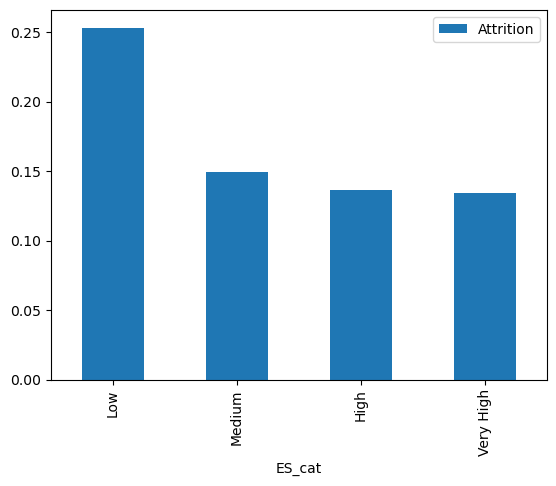

In [29]:
#data_ES = data[data['Attrition'].isin(['Yes', 'No'])].groupby(['ES_cat', 'Attrition']).size().unstack(fill_value=0)
data[['ES_cat','Attrition']].groupby(['ES_cat']).mean().sort_values(by='Attrition', ascending=False).plot(kind='bar')
# Sorting by the 'No' count in ascending order
#data_ES = data_ES.sort_values(by='No', ascending=True)
#data_ES

In [30]:
#environment satisfaction strongly related to attrition. when environment satisfaction is low, the employees likely to leave and vice versa

In [31]:
#How JobInvolvement affect the attrition rate


In [32]:
JI_mapping = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}

data['JI_cat'] = data['JobInvolvement'].replace(JI_mapping)

In [33]:
data['JI_cat'].value_counts()

JI_cat
High         868
Medium       375
Very High    144
Low           83
Name: count, dtype: int64

#data_JI = data[data['Attrition'].isin(['Yes', 'No'])].groupby(['JI_category', 'Attrition']).size().unstack(fill_value=0)
data[['JI_cat','Attrition']].groupby(['JI_cat']
# Sorting by the 'No' count in descending order
#data_JI = data_JI.sort_values(by='No', ascending=False)
#data_JI

<Axes: xlabel='JI_cat'>

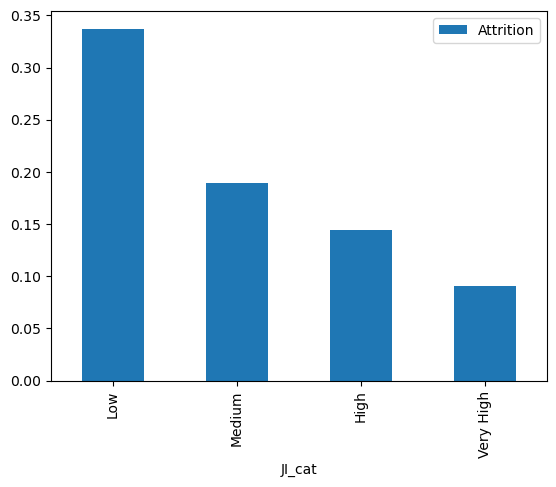

In [34]:
data[['JI_cat','Attrition']].groupby(['JI_cat']).mean().sort_values(by='Attrition',ascending=False).plot(kind='bar')
                                     

data_JI.plot(kind="bar")
plt.show()

In [ ]:
#when the job involment is high, the attrition is low. Interestingly, when job involvement is very high , the no attrition is not so high maybe risk factor

In [36]:
data[['DistanceFromHome','Attrition']].groupby(['DistanceFromHome']).mean().sort_values(by='Attrition',ascending=False)

,Attrition
DistanceFromHome,
24,0.428571
13,0.315789
22,0.315789
12,0.300000
27,0.250000
17,0.250000
25,0.240000
16,0.218750
9,0.211765


In [37]:
#Business Travel mapping
BT_mapping = {
    "Non-Travel":0,
    "Travel_Rarely": 1,
    "Travel_Frequently": 2
}

data['BT_cat'] = data['BusinessTravel'].replace(BT_mapping)
data['BusinessTravel']=data['BusinessTravel'].replace(BT_mapping)
data['BusinessTravel']=data['BusinessTravel'].astype('int64')
#data['ES_cat'].value_counts()

In [38]:
#job role mapping
JR_mapping  = {
    "Human Resources": 8, 
    "Manager": 7,
    "Healthcare Representative": 6,
    "Manufacturing Director": 5, 
    "Laboratory Technician" : 4,
    "Sales Representative": 3, 
    "Sales Executive": 2,
    "Research Director":1, 
    "Research Scientist": 0
}
data['JobRole']=data['JobRole'].replace(JR_mapping)
data['JobRole']=data['JobRole'].astype('int64')

In [39]:
#department mapping
Dept_mapping = {
    "Research & Development" : 0, 
    "Sales" : 1, 
    "Human Resources" : 2
}
data["Department"] = data["Department"].replace(Dept_mapping)
data["Department"] = data["Department"].astype("int64")

In [40]:
#education field mapping
EF_mapping = {
    "Life Sciences": 0, 
    "Medical": 1, 
    "Marketing" : 2,
    "Technical Degree" : 3, 
    "Human Resources" : 4, 
    "Other" : 5  }
data["EducationField"] = data["EducationField"].replace(EF_mapping)
data["EducationField"] = data["EducationField"].astype("int64")

In [41]:
#Gender mapping
G_mapping = {"Male": 1, "Female": 0}
data["Gender"] = data["Gender"].replace(G_mapping)
data["Gender"] = data["Gender"].astype("int64")

In [42]:
#marital status mapping
MT_mapping = {"Divorced": 2,"Married": 1, "Single": 0}
data["MaritalStatus"] = data["MaritalStatus"].replace(MT_mapping)
data["MaritalStatus"] = data["MaritalStatus"].astype("int64")

In [43]:
data['OverTime'] = 1.0*(data['OverTime'] == 'Yes')

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   float64
 2   BusinessTravel            1470 non-null   int64  
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   int64  
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   int64  
 8   EnvironmentSatisfaction   1470 non-null   int64  
 9   Gender                    1470 non-null   int64  
 10  HourlyRate                1470 non-null   int64  
 11  JobInvolvement            1470 non-null   int64  
 12  JobLevel                  1470 non-null   int64  
 13  JobRole                   1470 non-null   int64  
 14  JobSatis

In [45]:
data_corr=data.drop(['Education_cat','ES_cat','JI_cat','BT_cat'],axis=1)

In [46]:
data_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   float64
 2   BusinessTravel            1470 non-null   int64  
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   int64  
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   int64  
 8   EnvironmentSatisfaction   1470 non-null   int64  
 9   Gender                    1470 non-null   int64  
 10  HourlyRate                1470 non-null   int64  
 11  JobInvolvement            1470 non-null   int64  
 12  JobLevel                  1470 non-null   int64  
 13  JobRole                   1470 non-null   int64  
 14  JobSatis

In [47]:
#Correlation Matrix¶

data_trans = data.copy()
data_trans['Attrition'] = data_trans['Attrition'].apply(
    lambda x: 0 if x == 'No' else 1)

# Swap 'Age' and 'Attrition' columns
cols = list(data_trans.columns)
age_index, attrition_index = cols.index('Age'), cols.index('Attrition')
cols[age_index], cols[attrition_index] = cols[attrition_index], cols[age_index]

# Reindex DataFrame with the new column order
data_trans = data_trans[cols]

corr_matrix = data_trans.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, cmap="Blues", annot=True)

In [ ]:
pip install --upgrade seaborn

In [ ]:
conda install seaborn --upgrade

In [48]:
data_corr.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,-0.011807,0.010661,-0.007652,-0.001686,0.208034,-0.035850,0.010146,-0.036311,0.024287,0.029820,0.509604,0.179274,-0.004892,0.095029,0.497855,0.028051,0.299635,0.028062,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.127006,-0.056652,0.077351,0.077924,-0.031373,0.051567,-0.103369,0.029453,-0.006846,-0.130016,-0.169105,-0.041544,-0.103481,-0.162070,-0.159840,0.015170,0.043494,0.246118,-0.013478,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,-0.011807,0.127006,1.000000,-0.015539,-0.005436,-0.009696,-0.008670,-0.015275,-0.011310,-0.044896,-0.004164,0.029300,-0.011696,-0.005109,0.008666,-0.030915,-0.013450,-0.008440,-0.030743,0.042752,-0.025727,0.001683,0.008926,-0.028257,0.007972,0.016357,0.004209,0.005212,-0.005336,0.005222,-0.000229
DailyRate,0.010661,-0.056652,-0.015539,1.000000,-0.021959,-0.004985,-0.016806,-0.018291,0.018355,-0.011716,0.023381,0.046135,0.002966,-0.000438,0.030571,0.069586,0.007707,-0.032182,0.038153,0.009135,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.007652,0.077351,-0.005436,-0.021959,1.000000,0.002196,0.019636,0.189416,-0.026110,-0.000488,-0.021528,-0.017693,0.088018,0.169091,-0.006231,-0.007140,0.056573,-0.004124,-0.011261,0.000340,-0.034933,-0.029648,0.016154,-0.015585,-0.006602,-0.008549,0.075507,0.029752,0.009204,0.008394,0.002874
DistanceFromHome,-0.001686,0.077924,-0.009696,-0.004985,0.002196,1.000000,0.021042,0.005369,-0.016075,-0.001851,0.031131,0.008783,0.005303,-0.008566,-0.003669,0.014437,-0.017014,0.027473,-0.029251,0.025514,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.008670,-0.016806,0.019636,0.021042,1.000000,0.033467,-0.027128,-0.016547,0.016775,0.042438,0.101589,-0.011943,-0.011296,-0.004053,0.094961,-0.026084,0.126317,-0.020322,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.035850,0.051567,-0.015275,-0.018291,0.189416,0.005369,0.033467,1.000000,0.061149,0.017465,-0.045911,-0.014493,-0.006867,0.055207,-0.035976,0.013465,-0.012517,-0.034400,-0.007220,0.018606,-0.019401,-0.014649,-0.000440,-0.020446,-0.027703,-0.005588,0.047322,-0.022710,-0.015588,-0.029528,-0.010316
EnvironmentSatisfaction,0.010146,-0.103369,-0.011310,0.018355,-0.026110,-0.016075,-0.027128,0.061149,1.000000,0.000508,-0.049857,-0.008278,0.001212,0.028499,-0.006784,0.003593,-0.006259,0.037600,0.012594,0.070132,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.044896,-0.011716,-0.000488,-0.001851,-0.016547,0.017465,0.000508,1.000000,-0.000478,0.017960,-0.039403,-0.006357,0.033252,0.047183,-0.031858,-0.041482,-0.039147,-0.041924,0.002733,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


<Axes: >

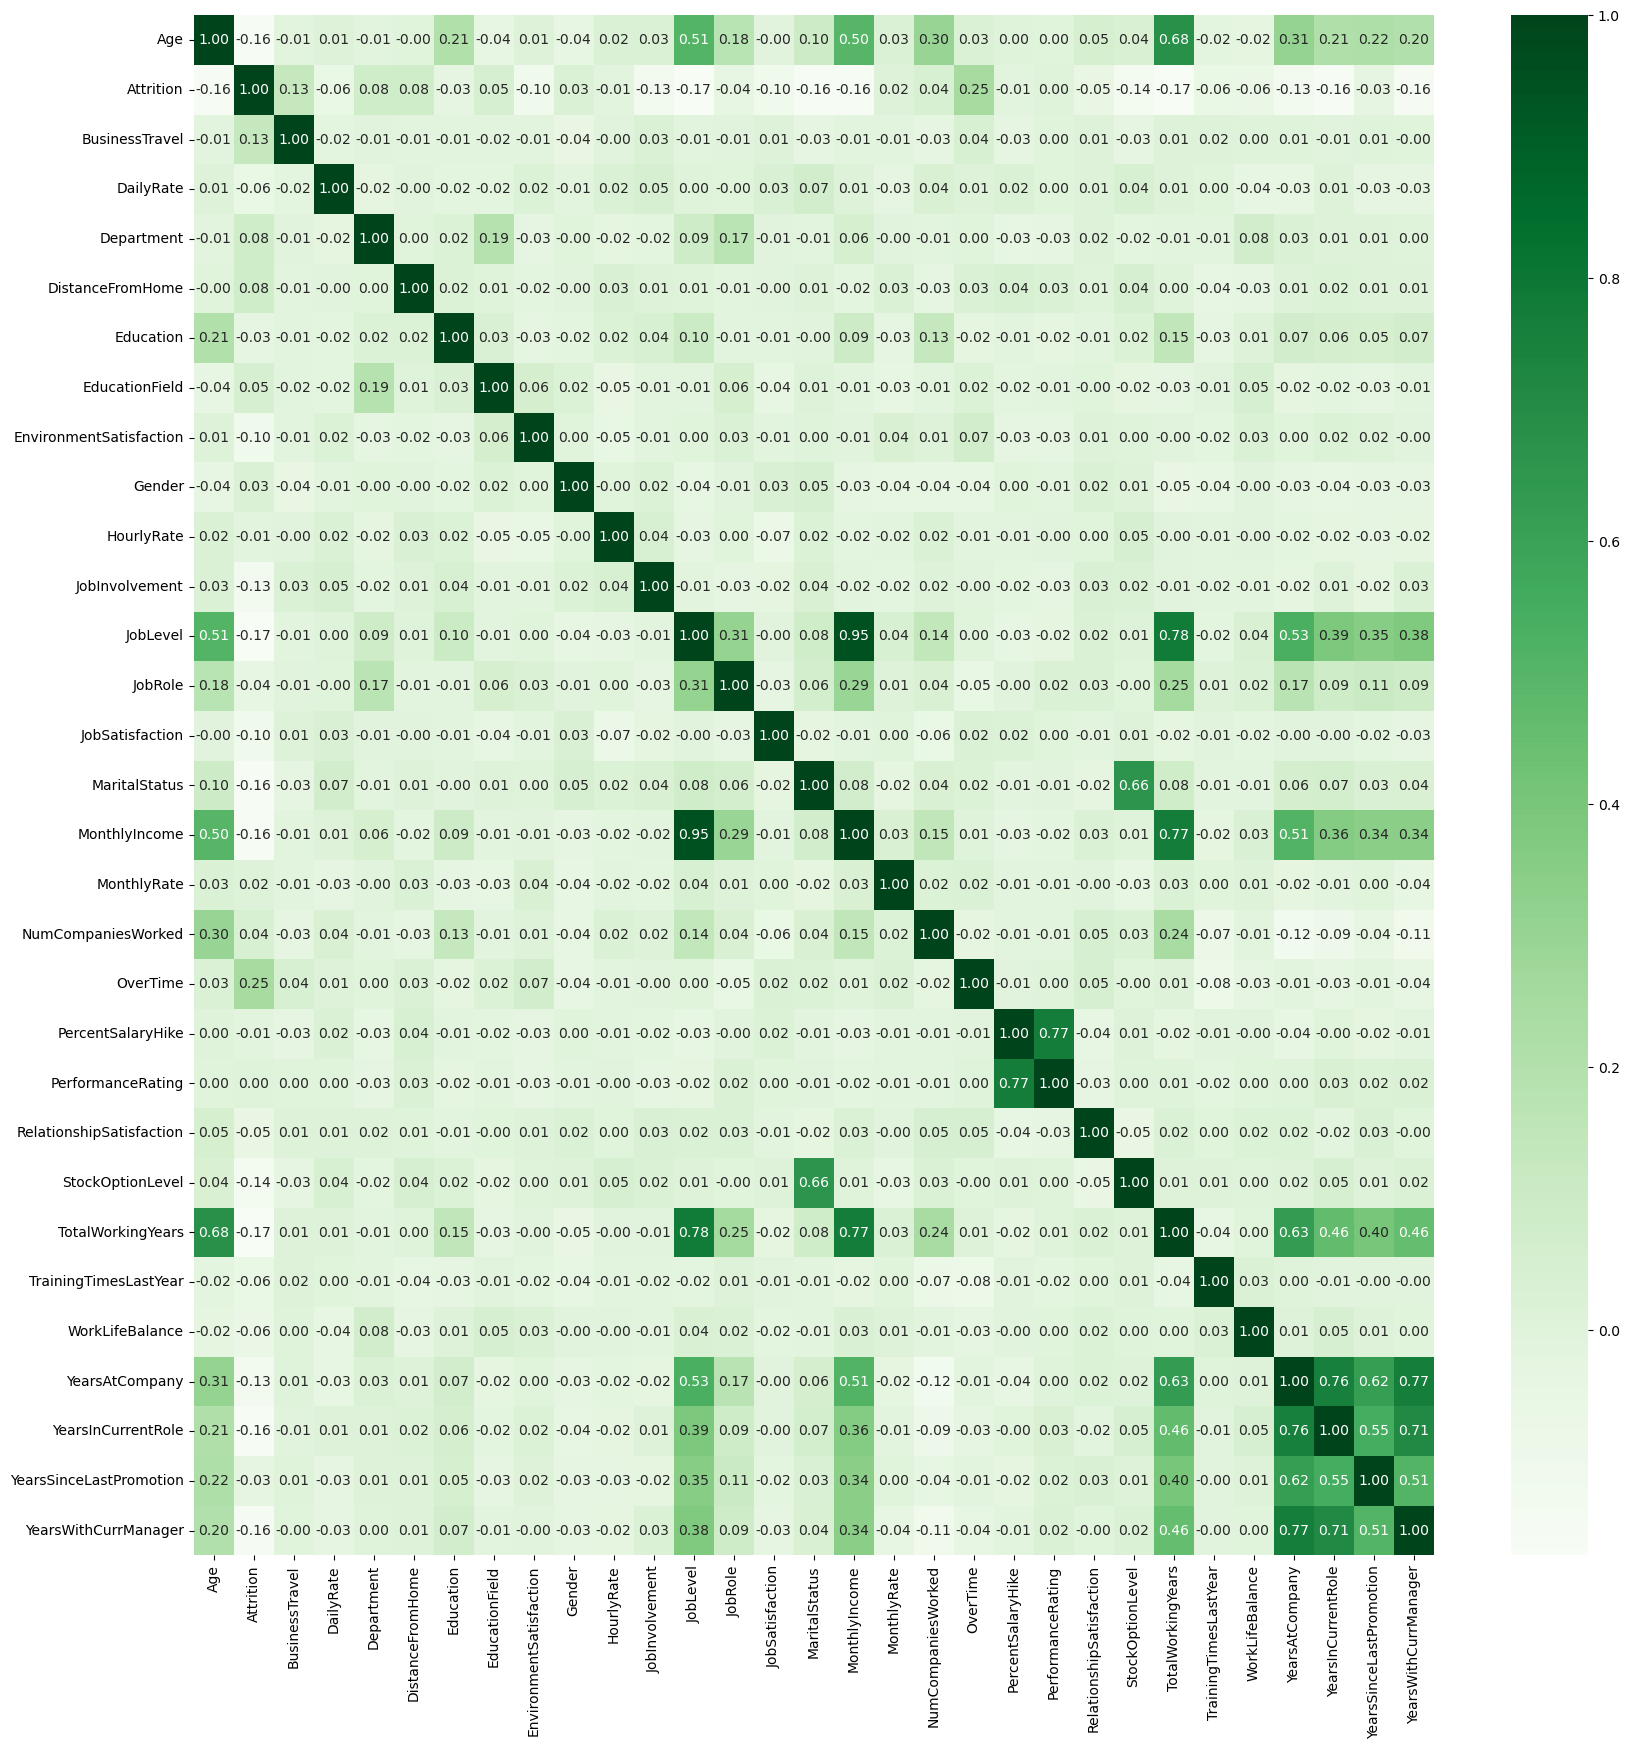

In [49]:
# Correlation Matrix (all columns)
plt.figure(figsize=(20,20))
sns.heatmap(data_corr.corr(), annot=True, fmt=".2f", cmap="Greens")

In [ ]:
 #Correlations Matrix in Regards to Attrition

# Selects 10 columns that has the highest correlation to Attrition
col = data_corr.corr().nlargest(10, "Attrition").Attrition.index

plt.figure(figsize=(15, 15))
sns.heatmap(data_corr[col].corr(), annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size":15})